In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import requests
from io import StringIO

# Step 1: Load the data
train_url = "https://raw.githubusercontent.com/chatreeasa/dataScience_WalmartSalesForecast/main/train.csv"
test_url = "https://raw.githubusercontent.com/chatreeasa/dataScience_WalmartSalesForecast/main/test.csv"

# Load the train data from the provided URL
train_response = requests.get(train_url).content
train_data = pd.read_csv(StringIO(train_response.decode('utf-8')))

# Load the test data from the provided URL
test_response = requests.get(test_url).content
test_data = pd.read_csv(StringIO(test_response.decode('utf-8')))

print("Done!! Step 1: Load the data")

Done!! Step 1: Load the data


In [4]:

# Step 2: Data Exploration
# Display basic information about the dataset
print(train_data.head())
print(train_data.info())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [5]:
# Step 3: Data Preprocessing
# Handle missing values
train_data = train_data.dropna()

print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [6]:

# Step 4: Feature Engineering
# Extract additional time-related features
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

print("Done")


Done


In [7]:

# Step 5: Model Selection
# Split the data into features (X) and target (y)
X = train_data[['Store', 'Dept', 'Month', 'Year', 'IsHoliday']]
y = train_data['Weekly_Sales']

# Step 6: Model Training
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Done")

Done


In [8]:
# Step 7: Model Evaluation
# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, val_predictions)
mse = mean_squared_error(y_val, val_predictions)
rmse = mse ** 0.5

print('Validation MAE:', mae)
print('Validation RMSE:', rmse)


Validation MAE: 1812.6574927925421
Validation RMSE: 4992.717785764754


In [11]:
print(test_data.info())

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year

print("Done")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None
Done


In [12]:

# Step 8: Model Deployment
# Retrain the model on the entire training data
model.fit(X, y)

# Make predictions on the test dataset
X_test = test_data[['Store', 'Dept', 'Month', 'Year', 'IsHoliday']]
test_predictions = model.predict(X_test)


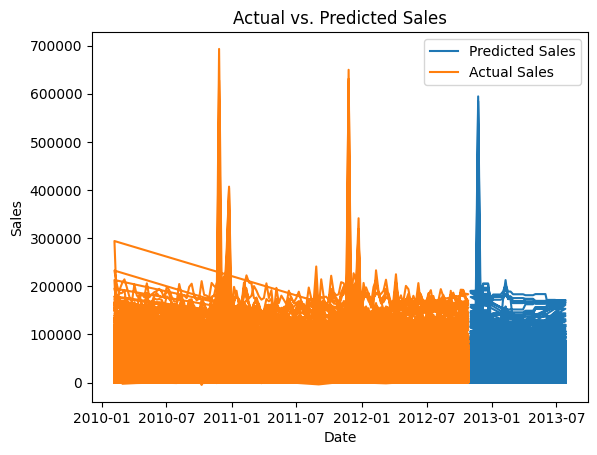

In [13]:

# Step 9: Results and Visualization
# Visualize actual vs. predicted sales
plt.plot(test_data['Date'], test_predictions, label='Predicted Sales')
plt.plot(train_data['Date'], train_data['Weekly_Sales'], label='Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Step 10: Business Insights
# Extract insights from the model and results to provide actionable recommendations to Walmart
# For example, identify peak sales periods, evaluate the impact of promotions, etc.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


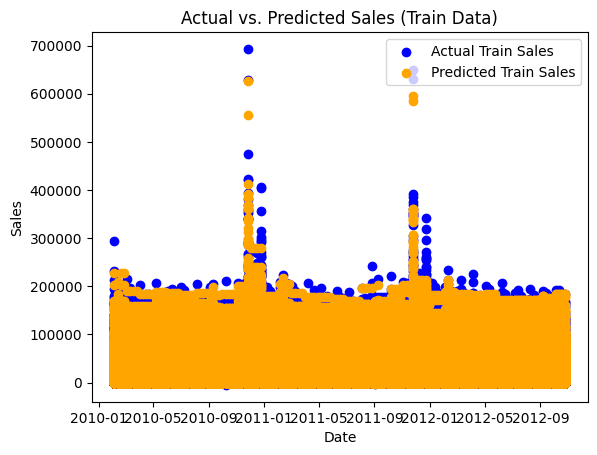

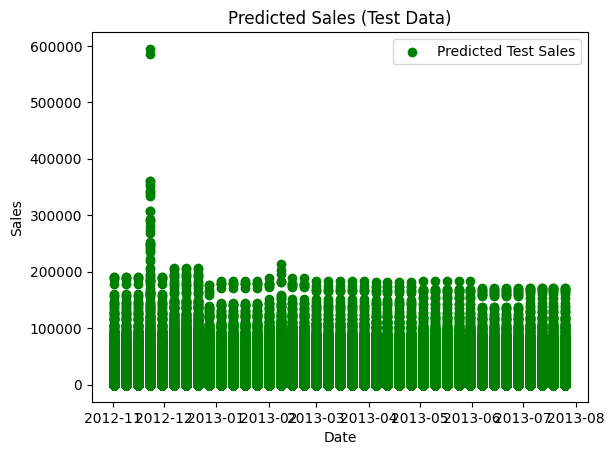

In [14]:
# Step 9: Results and Visualization
# Visualize actual vs. predicted sales for train dataset
plt.scatter(train_data['Date'], train_data['Weekly_Sales'], label='Actual Train Sales', color='blue')
plt.scatter(train_data['Date'], model.predict(X), label='Predicted Train Sales', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (Train Data)')
plt.legend()
plt.show()

# Visualize predicted sales for test dataset
plt.scatter(test_data['Date'], test_predictions, label='Predicted Test Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales (Test Data)')
plt.legend()
plt.show()
